In [97]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [58]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Project 11  : Medical Insurance cost prediction/insurance.csv')

In [59]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.shape

(1338, 7)

In [61]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [63]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [64]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

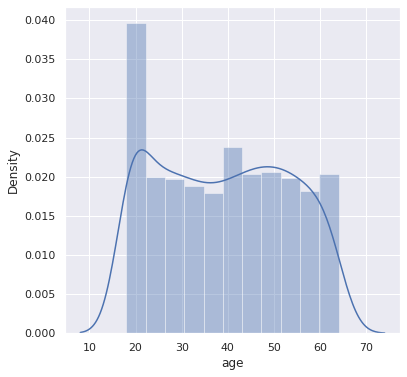

In [74]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

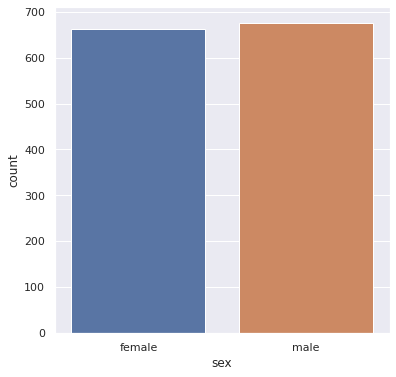

In [77]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

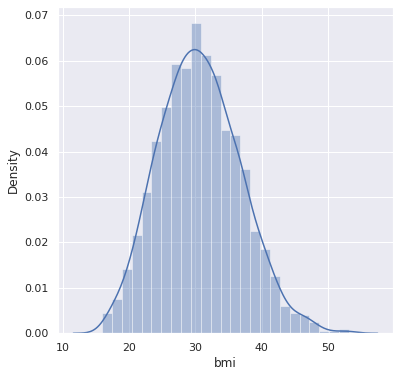

In [79]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

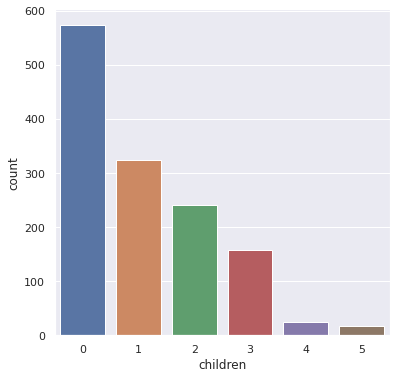

In [81]:
plt.figure(figsize=(6,6))
sns.countplot(x='children' , data=df)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

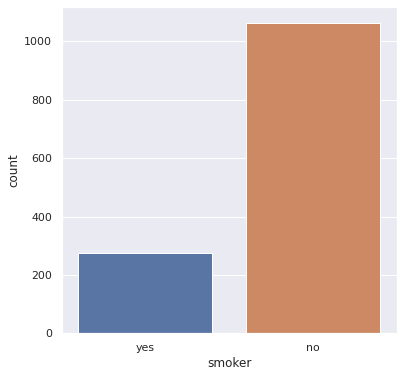

In [82]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker' , data=df)
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

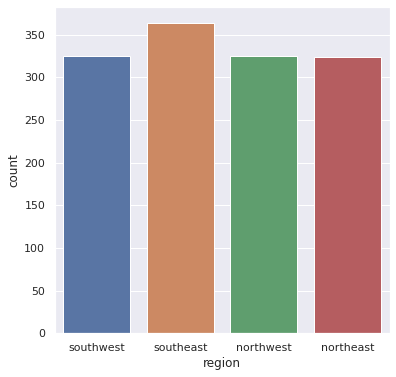

In [83]:
plt.figure(figsize=(6,6))
sns.countplot(x='region' , data=df)
plt.plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

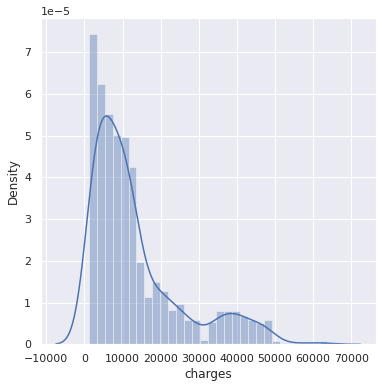

In [84]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.plot

In [85]:
df.replace({'sex':{'male':1,'female':0}, 'region':{'southeast':0,'southwest':1,'northwest':2 ,'northeast':3} , 'smoker':{'yes':1,'no':0}},inplace=True)

In [86]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [87]:
X  = df.drop(columns='charges',axis=1)
Y = df['charges']

In [88]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [89]:
X_train , X_test ,Y_train , Y_test = train_test_split(X, Y , random_state = 2 , test_size=0.2)

In [90]:
print(X.shape , X_test.shape , X_train.shape)

(1338, 6) (268, 6) (1070, 6)


In [91]:
regression = LinearRegression()

In [92]:
Fitted_data = regression.fit(X_train,Y_train)

In [93]:
predict_data = regression.predict(X_train)

In [98]:
score = r2_score(Y_train,predict_data)

In [99]:
print(score)

0.7518195459072954


In [100]:
predict_data = regression.predict(X_test)

In [101]:
score = r2_score(Y_test,predict_data)

In [102]:
print(score)

0.7454471618659976


In [104]:
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regression.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27524.88981206]
The insurance cost is USD  27524.889812064637


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
